In [23]:
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

print(os.getcwd())

from src.metrics import msr

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/a20125359/Documents/Projects/GeneExpression/GeneExpressionBiClustering/Notebooks


# 1. 0 Reading Data

In [17]:
SIMULATED_DATA = './TestData/SimulatedDataCoherence'

In [21]:
biclusterA_high             = np.array(pd.read_csv(f'{SIMULATED_DATA}/BiclusterA_high.csv', low_memory=False))
biclusterB_high             = np.array(pd.read_csv(f'{SIMULATED_DATA}/BiclusterB_high.csv', low_memory=False))
biclusterC_high             = np.array(pd.read_csv(f'{SIMULATED_DATA}/BiclusterC_high.csv', low_memory=False))
biclusterABC_high           = np.array(pd.read_csv(f'{SIMULATED_DATA}/BiclusterABC_high.csv', low_memory=False))

(99, 11)


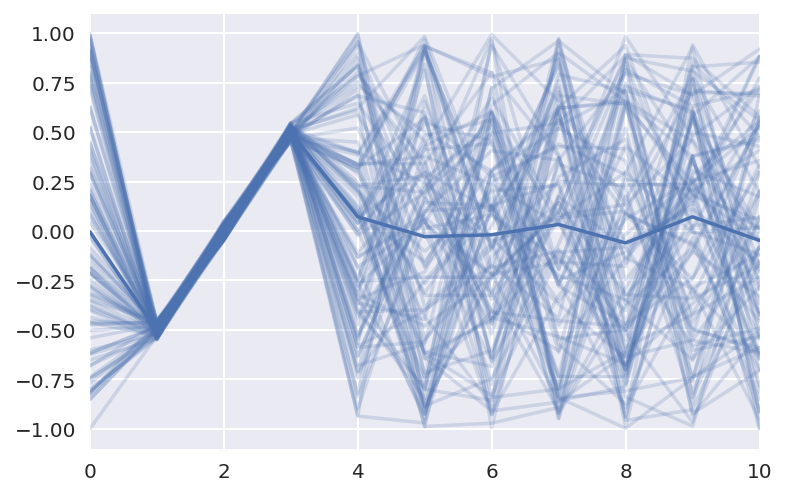

In [25]:
print(biclusterA_high.shape)
sns.tsplot(biclusterA_high, err_style='unit_traces')

(99, 11)


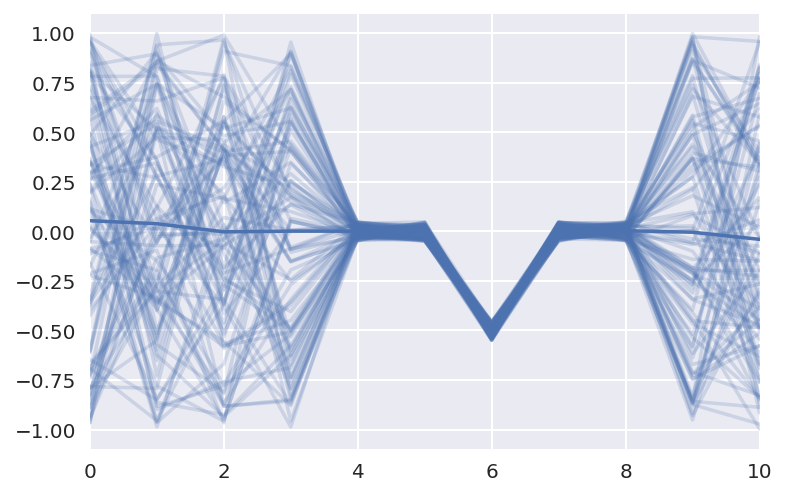

In [26]:
print(biclusterB_high.shape)
sns.tsplot(biclusterB_high, err_style='unit_traces')

(99, 11)


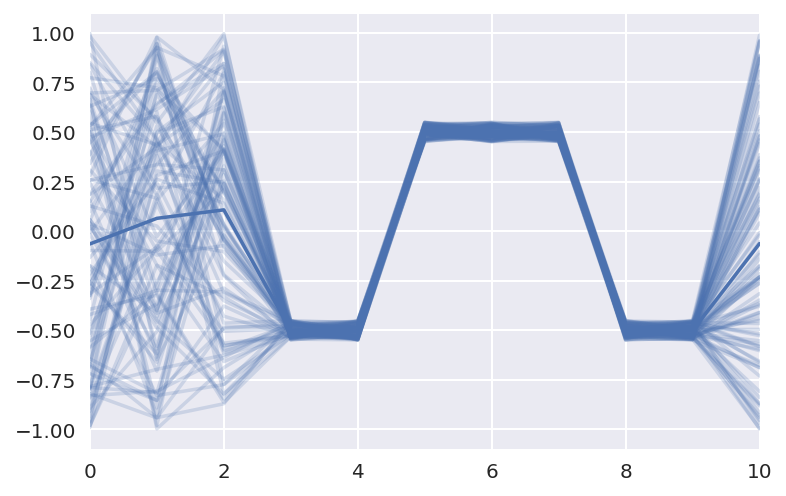

In [27]:
print(biclusterC_high.shape)
sns.tsplot(biclusterC_high, err_style='unit_traces')

(299, 11)


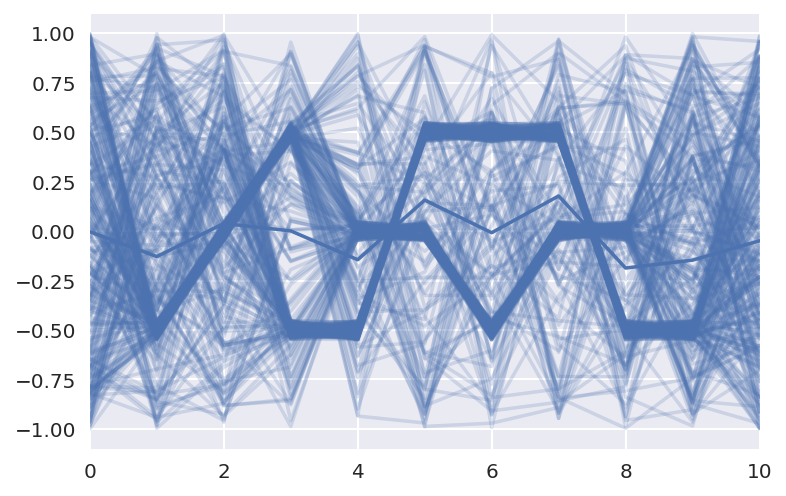

In [28]:
print(biclusterABC_high.shape)
sns.tsplot(biclusterABC_high, err_style='unit_traces')

# 2.0 Testing MSR

In [43]:
msrs = {'A': [msr(biclusterA_high)], 'B': [msr(biclusterB_high)], 'C': [msr(biclusterC_high)], 'ABC': [msr(biclusterABC_high)]}
for key, value in msrs.items():
    
    print("msr for %s: %0.2f" % (key, value[0]))

msr for A: 0.79
msr for B: 0.84
msr for C: 0.90
msr for ABC: 0.78


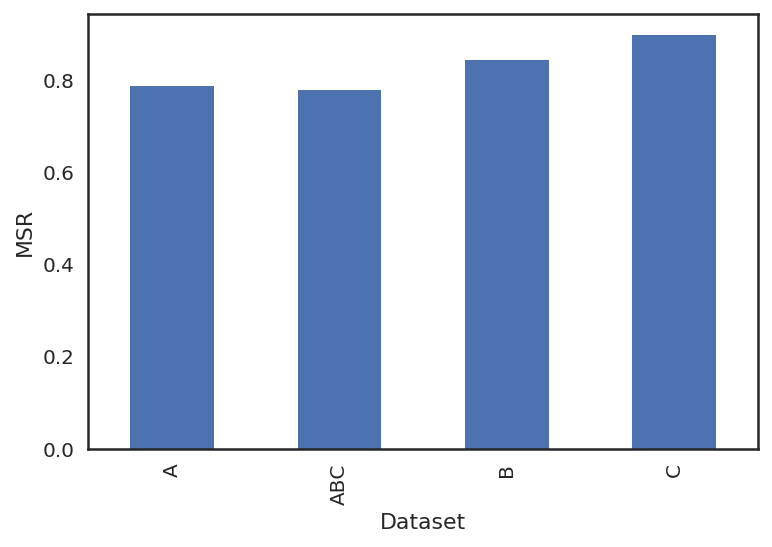

In [68]:
sns.set_style("white")
fig = pd.DataFrame.from_dict(msrs).T.plot.bar(legend=None)
fig.set_xlabel('Dataset')
fig.set_ylabel('MSR')